<a href="https://colab.research.google.com/github/mutiaratsani/computer-vision/blob/main/create_cnn_make_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD
import numpy as np
import cv2
import glob
import matplotlib.pyplot as plt
import zipfile

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1rysqzptTqz6-2BEeZcxNUqYItxH9jxQS' -O- | sed -rn 's/.confirm=([0-9A-Za-z_]+)./\1\n/p')&id=1rysqzptTqz6-2BEeZcxNUqYItxH9jxQS" -O /tmp/dataset.zip && rm -rf /tmp/cookies.txt

--2022-01-14 03:53:29--  https://docs.google.com/uc?export=download&confirm=&id=1rysqzptTqz6-2BEeZcxNUqYItxH9jxQS
Resolving docs.google.com (docs.google.com)... 74.125.137.139, 74.125.137.100, 74.125.137.138, ...
Connecting to docs.google.com (docs.google.com)|74.125.137.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-00-68-docs.googleusercontent.com/docs/securesc/nkb6ej9i9c152i5loa99f6kaad8rm51k/iod9jfnp31pnsk1karvuo6j6dhfjnrvm/1642132350000/05200325421108249014/02572093810601710111Z/1rysqzptTqz6-2BEeZcxNUqYItxH9jxQS?e=download [following]
--2022-01-14 03:53:30--  https://doc-00-68-docs.googleusercontent.com/docs/securesc/nkb6ej9i9c152i5loa99f6kaad8rm51k/iod9jfnp31pnsk1karvuo6j6dhfjnrvm/1642132350000/05200325421108249014/02572093810601710111Z/1rysqzptTqz6-2BEeZcxNUqYItxH9jxQS?e=download
Resolving doc-00-68-docs.googleusercontent.com (doc-00-68-docs.googleusercontent.com)... 142.250.141.132, 2607:f8b0:4023:c0b::84
Connecting to

In [ ]:
local_zip = '/tmp/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
imagePaths = '/tmp/dataset/'
label_list = ['belimbingwuluh', 'jeruknipis']
data = []
labels = []

In [ ]:
for label in label_list:
    for imagePath in glob.glob(imagePaths+label+'/*.png'):
        #print(imagePath)
        image = cv2.imread(imagePath)
        image = cv2.resize(image, (32, 32))
        data.append(image)
        labels.append(label)

In [ ]:
np.array(data).shape

(100, 32, 32, 3)

In [ ]:
# ubah type data dari list menjadi array
# ubah nilai dari tiap pixel menjadi range [0..1]
data = np.array(data, dtype='float') / 255.0
labels = np.array(labels)

In [ ]:
print(labels)

['belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh' 'belimbingwuluh'
 'belimbingwuluh' 'belimbingwuluh' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis' 'jeruknipis'
 'jeruknipis' 'jeruknipis' 'jeru

In [ ]:
# ubah nilai dari labels menjadi binary
lb = LabelEncoder()
labels = lb.fit_transform(labels)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

In [ ]:
print('Ukuran data train =', x_train.shape)
print('Ukuran data test =', x_test.shape)

Ukuran data train = (80, 32, 32, 3)
Ukuran data test = (20, 32, 32, 3)


In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1024, activation="relu"))
model.add(Dense(1, activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 1024)              3146752   
                                                                 
 dense_1 (Dense)             (None, 1024)              1049600   
                                                                 
 dense_2 (Dense)             (None, 1)                 1025      
                                                                 
Total params: 4,197,377
Trainable params: 4,197,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# tentukan hyperparameter
lr = 0.01
max_epochs = 100
opt_funct = SGD(learning_rate=lr)

In [ ]:
# compile arsitektur yang telah dibuat
model.compile(loss = 'binary_crossentropy', 
              optimizer = opt_funct, 
              metrics = ['accuracy'])

In [ ]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test), 
          epochs=max_epochs, batch_size=32)

Epoch 1/100
3/3 [==============================] - 1s 128ms/step - loss: 1.2508 - accuracy: 0.4375 - val_loss: 0.7796 - val_accuracy: 0.4000
Epoch 2/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6146 - accuracy: 0.6000 - val_loss: 0.6685 - val_accuracy: 0.4000
Epoch 3/100
3/3 [==============================] - 0s 35ms/step - loss: 0.9177 - accuracy: 0.4750 - val_loss: 0.8206 - val_accuracy: 0.6000
Epoch 4/100
3/3 [==============================] - 0s 34ms/step - loss: 1.2053 - accuracy: 0.3750 - val_loss: 0.8344 - val_accuracy: 0.4000
Epoch 5/100
3/3 [==============================] - 0s 34ms/step - loss: 0.6486 - accuracy: 0.5375 - val_loss: 0.4735 - val_accuracy: 0.8000
Epoch 6/100
3/3 [==============================] - 0s 34ms/step - loss: 0.4562 - accuracy: 0.8250 - val_loss: 0.4793 - val_accuracy: 0.7500
Epoch 7/100
3/3 [==============================] - 0s 35ms/step - loss: 0.4435 - accuracy: 0.8000 - val_loss: 0.4232 - val_accuracy: 0.8000
Epoch 8/100
3/3 [==

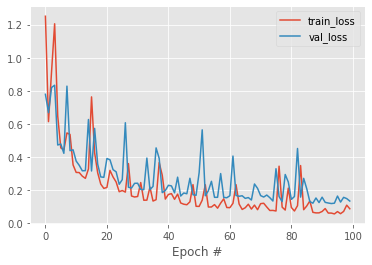

In [ ]:
N = np.arange(0, max_epochs)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
#plt.plot(N, H.history["accuracy"], label="train_acc")
#plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.xlabel("Epoch #")
plt.legend()
plt.show()

In [ ]:
# menghitung nilai akurasi model terhadap data test
predictions = model.predict(x_test, batch_size=32)
target = (predictions > 0.5).astype(np.int)
print(classification_report(y_test, target, target_names=label_list))

                precision    recall  f1-score   support

belimbingwuluh       1.00      0.92      0.96        12
    jeruknipis       0.89      1.00      0.94         8

      accuracy                           0.95        20
     macro avg       0.94      0.96      0.95        20
  weighted avg       0.96      0.95      0.95        20



In [ ]:
# uji model menggunakan image lain
queryPath = imagePaths+'/jeruknipis/jeruknipis (1).png'
query = cv2.imread(queryPath)
output = query.copy()
query = cv2.resize(query, (32, 32))
q = []
q.append(query)
q = np.array(q, dtype='float') / 255.0

q_pred = model.predict(q)
print(q_pred)

[[0.9834787]]


In [ ]:
if q_pred<=0.5 :
    target = "belimbingwuluh"
else :
    target = "jeruknipis"

print(target)
# text = "{}".format(target)
# cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
 
# # menampilkan output image
# cv2.imshow('Output', output)
# cv2.waitKey() # image tidak akan diclose,sebelum user menekan sembarang tombol
# cv2.destroyWindow('Output') # image akan diclose

jeruknipis


In [ ]:
model.save('belimbingjeruk.h5')